# John Snow Exercise 4: The Grand Experiment

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/John_Snow.jpg/640px-John_Snow.jpg" width = 300>

Being a doctor, John Snow had seen many people suffer and die from cholera. It primarily affected their gastrointestinal system (vomiting and diarrhea), leading to extreme dehydration and eventually death for many. Therefore, he was convinced that it had something to do with what people were eating or drinking. He focused on the water supplies of the people of South London. However, it would be hard for him to convince people to change their beliefs, but he knew he could do it with the right data.

<img src = "https://els-jbs-prod-cdn.jbs.elsevierhealth.com/cms/attachment/fccea2f1-d01a-4909-bc98-88a891733f63/fx2.jpg" width = 600>

There were 11 districts in South London. In order to conduct a more detailed investigation, he split these districts into 31 "sub-districts". The South districts of London were supplied mainly by two water companies: Lambeth and Southwark & Vauxhall. Both companies drew their water from the Thames. John Snow was able to collect detailed data about the sub-districts and their water supplies. Lucky you, we have it.

#### Datasets: `Grand_Experiment.csv`

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**Read the dataset into a dataframe named `Grand_Exp` and print it.**

In [12]:
Grand_Exp = pd.read_csv("data/Grand_Experiment.csv")
Grand_Exp

,district,subdistrict,Area (Acres),Elevation,"Houses, Inhabited",Value of Houses,People_per_house,water_supplier,percent_southwark,percent_lambeth,pop1849,deaths1849,death_rate1849,pop1854,deaths1854,death_rate1854
0,Bermondsey,St. James Bermondsey,688,0,5674,107821,6.6,SouthwarkVauxhall,1.000000,0.000000,17386,249,14.32,19134,362,18.919201
1,St. Saviour Southwark,St. Saviour Southwark,250,3,4659,174732,7.3,SouthwarkVauxhall,0.826838,0.000000,19432,283,14.56,20133,371,18.427457
2,St. Olave Southwark,St. Olave Southwark,250,3,4659,174732,9.1,SouthwarkVauxhall,1.000000,0.000000,8015,157,19.59,8015,161,20.087336
3,St. Olave Southwark,St. John Horsleydown,250,3,4659,174732,7.7,SouthwarkVauxhall,0.837219,0.000000,11100,192,17.30,11509,148,12.859501
4,St. Saviour Southwark,Christchurch Southwark,250,3,4659,174732,8.5,SouthwarkVauxhall_Lambeth,0.180344,0.807445,15730,256,16.27,16470,113,6.860959
5,Lambeth,Waterloo Road (1st),4015,3,17791,510341,8.1,SouthwarkVauxhall_Lambeth,0.236592,0.763408,13807,193,13.98,14521,58,3.994215
6,Lambeth,Waterloo Road (2nd),4015,3,17791,510341,8.4,SouthwarkVauxhall_Lambeth,0.373706,0.626294,18137,243,13.40,18668,117,6.267410
7,St. George Southwark,Borough Road,282,0,6663,155175,7.7,SouthwarkVauxhall_Lambeth,0.561958,0.438042,15635,312,19.96,16208,270,16.658440
8,St. George Southwark,Kent Road,282,0,6663,155175,7.1,SouthwarkVauxhall_Lambeth,0.683467,0.225837,17016,267,15.69,18933,174,9.190303
9,Lambeth,Lambeth Church (1st),4015,3,17791,510341,7.5,SouthwarkVauxhall_Lambeth,0.169753,0.830247,18409,215,11.68,18409,49,2.661742


John Snow chose to examine the two major outbreaks (1849 and 1854) see if there were differences in how each affected the south districts.

The code below will allow you to calculate the death rate for certain water companies for each of the two outbreaks (1849 and 1854). The way the code is written, it will show you the average death rate per 1000 for people that got their water from Southwark & Vauxhall during the 1849 outbreak. 

**Use the following code to calculate the average mortality associated with the water companies for both the 1849 and 1854 outbreaks.** 

In [13]:
Grand_Exp[(Grand_Exp['water_supplier'] == 'SouthwarkVauxhall')]['death_rate1849'].mean()

13.714999999999998

In [14]:
Grand_Exp[(Grand_Exp['water_supplier'] == 'SouthwarkVauxhall')]['death_rate1854'].mean()

13.12137505

In [15]:
Grand_Exp[(Grand_Exp['water_supplier'] == 'Lambeth')]['death_rate1849'].mean()

6.093333333333334

In [16]:
Grand_Exp[(Grand_Exp['water_supplier'] == 'Lambeth')]['death_rate1854'].mean()

1.3177655

In [18]:
Grand_Exp[(Grand_Exp['water_supplier'] == 'SouthwarkVauxhall_Lambeth')]['death_rate1849'].mean()

13.14375

In [17]:
Grand_Exp[(Grand_Exp['water_supplier'] == 'SouthwarkVauxhall_Lambeth')]['death_rate1854'].mean()

7.79686128125

Something had happened between 1849 and 1854. Lambeth had moved its water supply farther upstream on the Thames. Southwark & Vauxhall had not moved their water supply. What do your results suggest?

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/South_London_Map_1800.jpg/640px-South_London_Map_1800.jpg" width = 500>

John Snow chose to focus his investigation on certain subdistricts in South London.

**Choose which sub-districts you want to study by filtering them out by water supplier. The choice is yours, but it's a very important decision.** 

In [22]:
subdist = Grand_Exp[(Grand_Exp['water_supplier'] == 'SouthwarkVauxhall_Lambeth')]
subdist

,district,subdistrict,Area (Acres),Elevation,"Houses, Inhabited",Value of Houses,People_per_house,water_supplier,percent_southwark,percent_lambeth,pop1849,deaths1849,death_rate1849,pop1854,deaths1854,death_rate1854
4,St. Saviour Southwark,Christchurch Southwark,250,3,4659,174732,8.5,SouthwarkVauxhall_Lambeth,0.180344,0.807445,15730,256,16.27,16470,113,6.860959
5,Lambeth,Waterloo Road (1st),4015,3,17791,510341,8.1,SouthwarkVauxhall_Lambeth,0.236592,0.763408,13807,193,13.98,14521,58,3.994215
6,Lambeth,Waterloo Road (2nd),4015,3,17791,510341,8.4,SouthwarkVauxhall_Lambeth,0.373706,0.626294,18137,243,13.40,18668,117,6.267410
7,St. George Southwark,Borough Road,282,0,6663,155175,7.7,SouthwarkVauxhall_Lambeth,0.561958,0.438042,15635,312,19.96,16208,270,16.658440
8,St. George Southwark,Kent Road,282,0,6663,155175,7.1,SouthwarkVauxhall_Lambeth,0.683467,0.225837,17016,267,15.69,18933,174,9.190303
9,Lambeth,Lambeth Church (1st),4015,3,17791,510341,7.5,SouthwarkVauxhall_Lambeth,0.169753,0.830247,18409,215,11.68,18409,49,2.661742
10,St. George Southwark,London Road,282,0,6663,155175,7.5,SouthwarkVauxhall_Lambeth,0.160198,0.669582,17490,257,14.69,18368,93,5.063153
11,Lambeth,Lambeth Church (2nd),4015,3,17791,510341,7.0,SouthwarkVauxhall_Lambeth,0.326116,0.636830,25965,544,20.95,28062,193,6.877628
12,Lambeth,Kennington (1st),4015,3,17791,510341,6.1,SouthwarkVauxhall_Lambeth,0.669620,0.110225,22926,187,8.16,27401,303,11.057991
13,Camberwell,St. George Camberwell,4342,4,6843,180418,5.6,SouthwarkVauxhall_Lambeth,0.311699,0.511955,14578,176,12.07,17138,132,7.702182


**Is there a correlation between water supplier and mortality rate?** 

Let's look at 1849 first. The code below will show you if there is a correlation between getting your water from Lambeth and cholera in 1849. 

Text(0, 0.5, 'Death Rate (per 1000)')

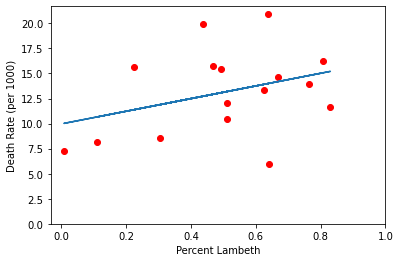

In [28]:
x = subdist['percent_lambeth']
a = subdist['death_rate1849']


plt.scatter(x, a, color='red')
plt.xlim(right = 1)
plt.ylim(bottom = 0)


m, b = np.polyfit(x, a, 1)
plt.plot(x, m*x + b)

plt.xlabel('Percent Lambeth')
plt.ylabel('Death Rate (per 1000)')


**Reuse and modify the code above** to see if there is a correlation between getting your water from Southwark & Vauxhall and cholera in 1849.

Text(0, 0.5, 'Death Rate (per 1000)')

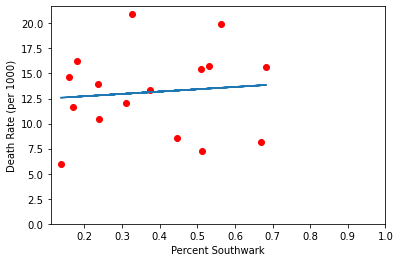

In [30]:
x = subdist['percent_southwark']
a = subdist['death_rate1849']


plt.scatter(x, a, color='red')
plt.xlim(right = 1)
plt.ylim(bottom = 0)


m, b = np.polyfit(x, a, 1)
plt.plot(x, m*x + b)

plt.xlabel('Percent Southwark')
plt.ylabel('Death Rate (per 1000)')


**Now do the same** for 1854 for each water company.

Text(0, 0.5, 'Death Rate (per 1000)')

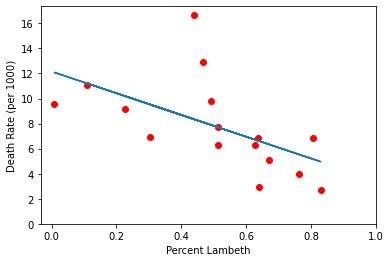

In [29]:
x = subdist['percent_lambeth']
a = subdist['death_rate1854']


plt.scatter(x, a, color='red')
plt.xlim(right = 1)
plt.ylim(bottom = 0)


m, b = np.polyfit(x, a, 1)
plt.plot(x, m*x + b)

plt.xlabel('Percent Lambeth')
plt.ylabel('Death Rate (per 1000)')


Text(0, 0.5, 'Death Rate (per 1000)')

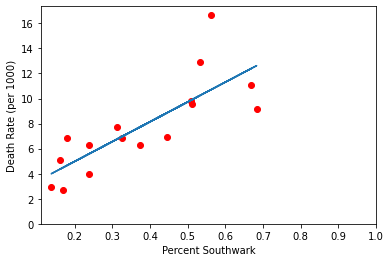

In [31]:
x = subdist['percent_southwark']
a = subdist['death_rate1854']


plt.scatter(x, a, color='red')
plt.xlim(right = 1)
plt.ylim(bottom = 0)


m, b = np.polyfit(x, a, 1)
plt.plot(x, m*x + b)

plt.xlabel('Percent Southwark')
plt.ylabel('Death Rate (per 1000)')


### Reflect: What is the conclusion of your Grand Experiment? Can you present irrefutable evidence? 